<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
# Your code here
from bs4 import BeautifulSoup 
import requests  
import pandas as pd

Download the webpage at the url


In [4]:
#your code goes here
data  = requests.get(url).text

Create a soup object


In [5]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")

Scrape the `Language name` and `annual average salary`.


In [6]:
#your code goes here
table = soup.find('table')

In [7]:
df = pd.DataFrame(columns=["Language", "Average Annual Salary"])
for row in table.find_all('tr'):                 
    cols = row.find_all('td') 
    language = cols[1].getText() 
    salary = cols[3].getText() 
    print("{}------------->{}".format(language, salary))
    df1 = pd.DataFrame({'Language': [language], 'Average Annual Salary': [salary]})
    df = pd.concat([df, df1], ignore_index = True)

Language------------->Average Annual Salary
Python------------->$114,383
Java------------->$101,013
R------------->$92,037
Javascript------------->$110,981
Swift------------->$130,801
C++------------->$113,865
C#------------->$88,726
PHP------------->$84,727
SQL------------->$84,793
Go------------->$94,082


In [8]:
df.drop(df.index[0], inplace=True)

Save the scrapped data into a file named *popular-languages.csv*


In [9]:
# your code goes here
df.to_csv('popular-languages.csv', index = False)

In [10]:
df= pd.read_csv("popular-languages.csv", index_col = 'Language')
df.index.name = None
s = df['Average Annual Salary'].str.replace('$', '')
s

Python        114,383
Java          101,013
R              92,037
Javascript    110,981
Swift         130,801
C++           113,865
C#             88,726
PHP            84,727
SQL            84,793
Go             94,082
Name: Average Annual Salary, dtype: object

In [11]:
s1 = s.str.replace(',', '')
s1

Python        114383
Java          101013
R              92037
Javascript    110981
Swift         130801
C++           113865
C#             88726
PHP            84727
SQL            84793
Go             94082
Name: Average Annual Salary, dtype: object

In [12]:
s2 = s1.astype(float)
s2
s2.sort_values(ascending = False, inplace = True)
s2

Swift         130801.0
Python        114383.0
C++           113865.0
Javascript    110981.0
Java          101013.0
Go             94082.0
R              92037.0
C#             88726.0
SQL            84793.0
PHP            84727.0
Name: Average Annual Salary, dtype: float64

In [13]:
languages = s2.index.to_list()
languages

['Swift', 'Python', 'C++', 'Javascript', 'Java', 'Go', 'R', 'C#', 'SQL', 'PHP']

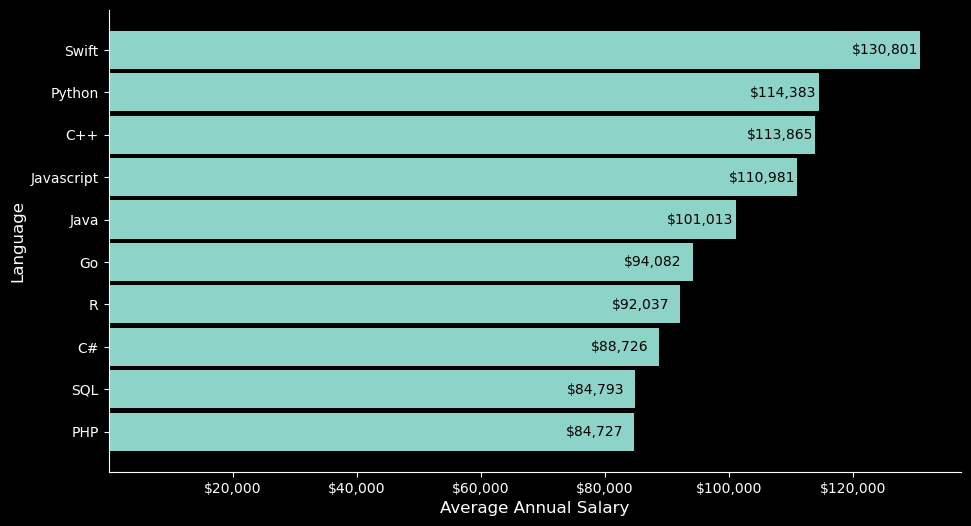

In [14]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize = (11, 6))
for index, value in enumerate(s2):
    label = format(int(value), ',')
    plt.annotate('$'+ label, xy=(value - 11000, index + 0.1), color='black')
plt.barh(languages, width = s2, height = 0.9)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.set_frame_on(True)
plt.gca().invert_yaxis()
# plt.title('Average Annual Salary', fontsize = 16)
plt.xlabel("Average Annual Salary", fontsize = 12)
plt.ylabel('Language', fontsize = 12)
plt.xticks([20000, 40000, 60000, 80000, 100000, 120000], labels =['$20,000','$40,000','$60,000','$80,000', '$100,000', '$120,000'])
plt.savefig('Average_salary_chart')
plt.show()

In [15]:
# plt.style.available

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
